# Pregunta 1 (12 puntos)

En base al notebook ([link](https://drive.google.com/file/d/1U6w7ngQmASnMIgL2kdlNGDvpyX4GHEND/view?usp=sharing))

Desarrolle lo siguiente:


*   Una función que permita, a través de sliders, recortar una imagen.
*   Realizar búsqueda a través de la imagen.


**Recuerde que se debe hacer en funciones y verificar las dimensiones (ancho y alto) de la imagen.**

In [ ]:
# desarrolle su código aquí


# Pregunta 2 (8 puntos)

Utilice el dataset de mamografías y halle los valores recomendados para min_sigma y max_sigma para hallar masas especuladas.

Puede tomar de ejemplo la imagen: mdb97.png

Se deja un ejemplo con ese caso con el que puede realizar sus pruebas

In [1]:
!gdown 1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u
!unzip Imagenes.zip

Downloading...
From (uriginal): https://drive.google.com/uc?id=1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u
From (redirected): https://drive.google.com/uc?id=1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u&confirm=t&uuid=419adcf4-240c-456a-98f8-699cece05389
To: d:\Codes\image-processing\src\6_Dominio_Frecuencia\Imagenes.zip

  0%|          | 0.00/30.8M [00:00<?, ?B/s]
  2%|▏         | 524k/30.8M [00:00<00:08, 3.60MB/s]
  7%|▋         | 2.10M/30.8M [00:00<00:03, 9.51MB/s]
 15%|█▌        | 4.72M/30.8M [00:00<00:02, 9.25MB/s]
 27%|██▋       | 8.39M/30.8M [00:00<00:02, 9.60MB/s]
 34%|███▍      | 10.5M/30.8M [00:01<00:02, 8.57MB/s]
 39%|███▉      | 12.1M/30.8M [00:01<00:02, 7.97MB/s]
 46%|████▌     | 14.2M/30.8M [00:01<00:01, 8.66MB/s]
 58%|█████▊    | 17.8M/30.8M [00:01<00:00, 13.1MB/s]
 65%|██████▍   | 19.9M/30.8M [00:01<00:00, 11.9MB/s]
 70%|██████▉   | 21.5M/30.8M [00:02<00:00, 9.76MB/s]
 85%|████████▌ | 26.2M/30.8M [00:02<00:00, 13.5MB/s]
100%|██████████| 30.8M/30.8M [00:02<00:00, 16.2MB/s]
100%|██████████| 30

Archive:  Imagenes.zip
  inflating: Imagenes/20191123_093200.jpg  
  inflating: Imagenes/Aviones.jpg    
  inflating: Imagenes/bird.png       
  inflating: Imagenes/cameraman.tif  
  inflating: Imagenes/centro1.jpg    
  inflating: Imagenes/centro2.png    
  inflating: Imagenes/claro.png      
  inflating: Imagenes/contrast1.jpg  
  inflating: Imagenes/contrast2.jpeg  
  inflating: Imagenes/contrast3.jpg  
  inflating: Imagenes/diagonalbars.png  
  inflating: Imagenes/digits.png     
  inflating: Imagenes/DSC_4141.JPG   
  inflating: Imagenes/DSC_4142.JPG   
  inflating: Imagenes/DSC_4143.JPG   
  inflating: Imagenes/DSC_4144.JPG   
  inflating: Imagenes/DSC_4145.JPG   
  inflating: Imagenes/DSC_4146.JPG   
  inflating: Imagenes/DSC_4147.JPG   
  inflating: Imagenes/eight.tif      
  inflating: Imagenes/filter.png     
  inflating: Imagenes/horizontalbars.png  
  inflating: Imagenes/ipad-min.jpeg  
  inflating: Imagenes/lima1.png      
  inflating: Imagenes/lima2.png      
  inflating:

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import feature, color, filters

In [4]:
def diferenciaGaussianos2(original_image, plotDog=False):
    img = color.rgb2gray(original_image)

    k = 1.6

    if plotDog:
        plt.figure(figsize=(10,10))
        plt.subplot(2,3,1)
        plt.imshow(original_image)
        plt.title('Original Image')

    for idx,sigma in enumerate([8.0,16.0,32.0,64.0]):
        s1 = filters.gaussian(img,k*sigma)
        s2 = filters.gaussian(img,sigma)

        # Calcular la diferencia
        dog = s1 - s2
        plt.subplot(2,3,idx+2)
        plt.imshow(dog,cmap='RdBu')
        plt.title('DoG with sigma=' + str(sigma) + ', k=' + str(k))

    ax = plt.subplot(2,3,6)

    #Se calculan los máximos y los mínimos de las diferencias de Gaussianos
    blobs_dog = [(x[0],x[1],x[2]) for x in feature.blob_dog(img, min_sigma=35, max_sigma=40,threshold=0.1,overlap=0.5)]

    #remove duplicates
    blobs_dog = set(blobs_dog)

    img_blobs = original_image.copy()
    print(blobs_dog)
    for blob in blobs_dog:
        y, x, r = blob
        img_blobs = cv2.circle(img_blobs, (np.int32(x), np.int32(y)), np.int32(r), (0, 255, 0), 2)

    if plotDog:
        plt.imshow(img_blobs)
        plt.title('Detected DoG Maxima')
        plt.show()

    return img_blobs

{(502.0, 794.0, 35.0), (88.0, 790.0, 35.0), (755.0, 791.0, 35.0)}


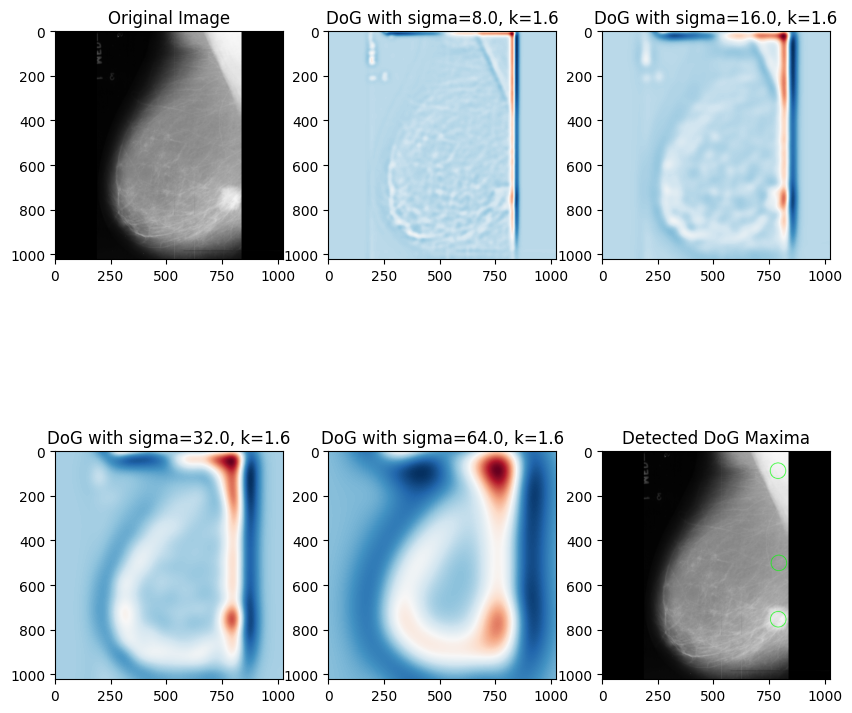

In [5]:
img = cv2.imread('Imagenes/mamografias/mdb97.png')
img = img[:,:,::-1]
result = diferenciaGaussianos2(img, plotDog=True)